In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import cmath
from numpy import *
from numpy.linalg import inv
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io import wavfile
from IPython.display import Audio

### Reading the wav file

Audio Type: int16
Samples = 22073   Channels = 2
Sampling frequency = 44100 Hz
Audio length: 501 mili-seconds


Text(0,0.5,'Amplitude')

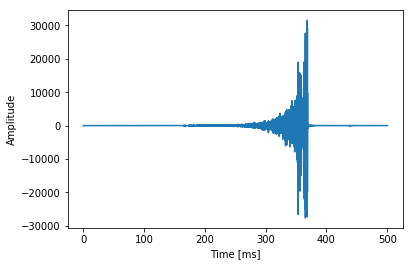

In [2]:
fs, audio = wavfile.read('audio.wav')
Audio('audio.wav')
print(f"Audio Type: {audio.dtype}")
print(f"Samples = {audio.shape[0]}   Channels = {audio.shape[1]}")
print(f"Sampling frequency = {fs} Hz")

audio = audio.T[0]
samples = audio.shape[0]
L = (samples / fs)*1000
print(f'Audio length: {L:.0f} mili-seconds')

f, ax = plt.subplots()
ax.plot((np.arange(samples) / fs)*1000, audio)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Amplitude')

### Defining the Haar Transform and the Errors

In [3]:
h2 = np.array([[1,1],[1,-1]])
def haar_mat(n):
    n = int(n)
    if n == 1:
        return h2
    else:
        a = np.kron(haar_mat(n-1),[1,1])
        b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
        #print(np.concatenate((a,b),axis=0))
        return np.concatenate((a,b),axis=0)

def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

def ihaar(y): #calculating inverse haar for x
    n = int(math.log(len(y),2))
    N = len(y)
    hn = haar_mat(n)
    return np.matmul(np.transpose(hn)/N,np.transpose(y))

def Ehaar(x,y,L): #calculating error for haar transform
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = ihaar(y)
    return ((x - x_m) ** 2).mean(axis=0)

def Edft(x,y,L): #calculating error dft for x
    N = len(y)
    a = int((N+1-L)/2)
    b = int((N-1+L)/2)
    for i in range(a,b+1):
        y[i] = 0
    x_m = ifft(y)
    return ((x - x_m)**2).mean(axis=0)

def Edct(x,y,L): #calculating error dct for x
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = idct(y)/(2*len(x))
    return ((x - x_m) ** 2).mean(axis=0)

In [4]:
audio = audio[0:5292]
error_dft = [0.]*len(audio)
error_dct = [0.]*len(audio)
error_haar = [0.]*len(audio)
y_dft = fft(audio)
y_dct = dct(audio)
y_haar = haar(audio[0:4096])
for L in range(len(audio)):
    error_dft[L] = Edft(audio,y_dft,L)
    error_dct[L] = Edct(audio,y_dct,L)
    error_haar[L] = Ehaar(audio[0:4096],y_haar,L)

### Comparison of Errors

/home/pranavkhadpe/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


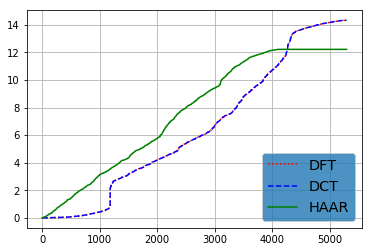

In [6]:
fig, ax = plt.subplots()
ax.plot(error_dft, 'r:', label='DFT') 
ax.plot(error_dct,'b--', label = 'DCT') 
ax.plot(error_haar, 'g', label='HAAR')
ax.grid()
legend = ax.legend(loc='lower right', fontsize='x-large')
legend.get_frame().set_facecolor('C0')